In [8]:
import pandas as pd

In [306]:
url_pets = "https://raw.githubusercontent.com/praktikum-hackathon/hackathon/dev/Research/data/pets.csv"
url_transactions = "https://raw.githubusercontent.com/praktikum-hackathon/hackathon/dev/Research/data/transactions.csv"
url_pricing = "https://raw.githubusercontent.com/praktikum-hackathon/hackathon/dev/Research/data/pricing.csv"

In [331]:
pets = pd.read_csv(url_pets)
transactions = pd.read_csv(url_transactions)
pricing = pd.read_csv(url_pricing)

In [332]:
len(pets)

1554

In [333]:
pets.columns = ['id', 'nickname', 'profile_link', 'shelter', 
        'city', 'breed', 'type', 'birthday', 'sex', 
        'favorite', 'home', 'homeless', 'walk']

In [334]:
cats = pets[pets['type'] == 'Кошки']

In [335]:
cats_female = cats[cats['sex'] == 'девочка']

In [336]:
cats_male = cats[cats['sex'] == 'мальчик']

In [337]:
cats_male_home = cats_male[cats_male['home'] == 1]

In [338]:
cats_male_homeless = cats_male[cats_male['home'] != 1]

In [339]:
cats_female_home = cats_female[cats_female['home'] == 1]

In [340]:
cats_female_homeless = cats_female[cats_female['home'] != 1]

In [341]:
len(cats_male_home), len(cats_female_home)

(466, 607)

In [342]:
len(cats_male_homeless), len(cats_female_homeless)

(121, 205)

In [343]:
len(cats_male), len(cats_female)

(587, 812)

In [344]:
homeless_male_cats_ratio = len(cats_male_homeless) / len(cats_male)

In [345]:
homeless_female_cats_ratio = len(cats_female_homeless) / len(cats_female)

In [346]:
homeless_male_cats_ratio

0.2061328790459966

In [347]:
homeless_female_cats_ratio

0.2524630541871921

In [348]:
data = {'male': [len(cats_male_home),len(cats_female_home)],
'female': [len(cats_male_homeless),len(cats_female_homeless)]}

sex_home = pd.DataFrame(data, columns = ['male', 'female'], index=['home', 'homeless'])

In [349]:
sex_home = sex_home.T

In [365]:
sex_home

,home,homeless
male,466,607
female,121,205


AttributeError: 'DataFrame' object has no attribute 'write_csv'

In [368]:
sex_home['total'] = sex_home['home'] + sex_home['homeless']

In [369]:
sex_home['home_ratio'] = sex_home['home'] / sex_home['total']

In [372]:
sex_home

,home,homeless,total,home_ratio
male,466,607,1073,0.434296
female,121,205,326,0.371166


In [373]:
sex_home['homeless_ratio'] = sex_home['homeless'] / sex_home['total']

In [290]:
len(cats)

1399

In [374]:
sex_home.

,home,homeless,total,home_ratio,homeless_ratio
male,466,607,1073,0.434296,0.565704
female,121,205,326,0.371166,0.628834


In [330]:
import matplotlib.pyplot as plt

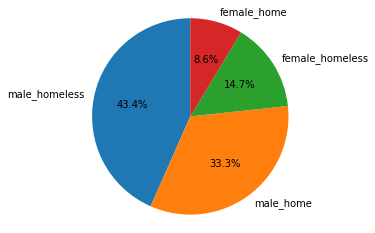

In [363]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['male_homeless', 'male_home', 'female_homeless', 'female_home']
sizes = [sex_home['homeless']['male'], sex_home['home']['male'], sex_home['homeless']['female'], sex_home['home']['female']]
explode = (0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['male_homeless', 'male_home', 'female_homeless', 'female_home']
sizes = [sex_home['homeless']['male'], sex_home['home']['male'], sex_home['homeless']['female'], sex_home['home']['female']]
explode = (0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['male_homeless', 'male_home', 'female_homeless', 'female_home']
sizes = [sex_home['homeless']['male'], sex_home['home']['male'], sex_home['homeless']['female'], sex_home['home']['female']]
explode = (0, 0, 0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()

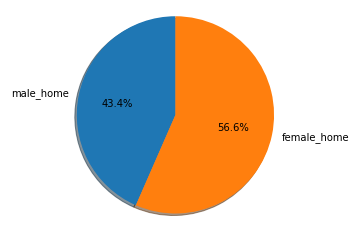

In [353]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['male_home', 'female_home']
sizes = [466, 607]
explode = (0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [303]:
pets['breed'].unique()

array(['Без породы', 'Мейн-кун', 'Немецкая овчарка', 'Британец',
       'Метис Британки', 'Ангорская кошка', 'Русский голубой',
       'Курильский бобтейл', 'Манчкин', 'Тойгер', 'Хайленд-фолд ',
       'Эрмитажная', 'Экзот ', 'Украинский левкой', 'Перс ',
       'Девон- рекс', 'Ориетал', 'Британская вислоухая кошка', 'Сфинкс',
       'Американский стаффордширский терьер', 'Питбуль', 'Кане-корсо',
       'Петерболд', 'Тайская', 'Аргентинский дог', 'Хаски', 'Персидская',
       'Сиамская', 'Шарпей', 'Корниш-рекс', 'Скоттишфолд'], dtype=object)

In [228]:
df = pets.groupby('city')['shelter'].count()

In [230]:
df = pets.groupby('shelter')['city'].count()

In [221]:
df = pets.groupby('city')['shelter']

In [233]:
df

shelter
4 лапы                                          9
Добрые сердца                                  28
Ковчег                                          1
Кот и Пёс                                      63
Котланд-Ярд                                     4
Котофей                                        88
Кошачий приют "ДОМИК"                         113
Лаюшки и Мяушки                                20
Люськин дом                                    54
Лёхин дом                                      48
Матроскин                                     330
Мокрый нос                                     46
Приют для кошек "Потеряшка"                    25
Приют для кошек "ЯрКот"                        51
Реабилитационный центр ЗОО Дом                  5
Республика котов                               12
Республика кошек                               16
Самарский приют для животных "НадеждА"        350
Стационар для Животных "Сен Бернар"             2
Убежище                                   

In [246]:
pets[pets['shelter'] == 'Котофей'].head(50)

,id,nickname,profile_link,shelter,city,breed,type,birthday,sex,favorite,home,homeless,walk
325,328,Соня,https://teddyfood.com/ru/animals/Sonia_p/,Котофей,Пермь,Без породы,Кошки,2015-06-20,девочка,6,1,0,0
326,329,Амур,https://teddyfood.com/ru/animals/Amur/,Котофей,Пермь,Без породы,Кошки,2016-02-20,мальчик,2,1,0,0
341,345,Аватар,https://teddyfood.com/ru/animals/Avatar/,Котофей,Пермь,Без породы,Кошки,2015-07-20,мальчик,0,1,0,0
343,347,Кузина,https://teddyfood.com/ru/animals/Cousina/,Котофей,Пермь,Без породы,Кошки,2011-04-20,девочка,3,1,0,0
349,353,Пьер,https://teddyfood.com/ru/animals/Pierre/,Котофей,Пермь,Без породы,Кошки,2013-08-20,мальчик,2,1,0,0
359,363,Мандаринка,https://teddyfood.com/ru/animals/Mandarinka/,Котофей,Пермь,Без породы,Кошки,2015-10-10,девочка,10,1,0,0
360,364,Сникерс,https://teddyfood.com/ru/animals/Snickers/,Котофей,Пермь,Без породы,Кошки,2016-08-20,мальчик,6,1,0,1
361,365,Канапешка,https://teddyfood.com/ru/animals/Kanapeshka/,Котофей,Пермь,Без породы,Кошки,2015-06-20,девочка,3,1,0,0
383,387,Феликс,https://teddyfood.com/ru/animals/Felix_p/,Котофей,Пермь,Без породы,Кошки,2016-05-20,мальчик,4,1,0,0
388,392,Вася,https://teddyfood.com/ru/animals/Vasya_cat/,Котофей,Пермь,Без породы,Кошки,2015-05-20,мальчик,1,1,0,0


In [ ]:
data_pivot = data.pivot_table(index = ['column1', 'column2'], columns = 'source',
values = 'column_pivot', aggfunc = 'function')
# index - столбец или столбцы, по которым происходит группировка данных
# columns - столбец по значениям которого будет происходить группировка
# values - значения, по которым мы хотим увидеть сводную таблицу
# aggfunc - функция, которая будет применяться к значениям